The following configurations allow TPOT2 to learn a symbolic classification or regression model.


Leafs: Leaves can either select individual columns or output 1's or 0's.

Inner nodes: arithmetic operators

Root: logistic regression

Symbolic Classification

Generation: 100%|██████████| 50/50 [02:07<00:00,  2.55s/it]


0.838773681515617


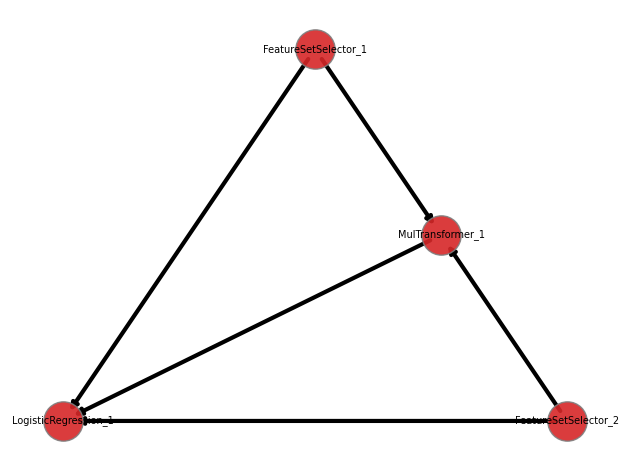

In [1]:
import tpot2
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
from tpot2.builtin_modules import ZeroTransformer, OneTransformer
from tpot2.config.classifiers import params_LogisticRegression

root_config_dict =  {LogisticRegression: params_LogisticRegression}
leaf_config_dict = ["feature_set_selector", {ZeroTransformer: {}, OneTransformer: {}}]


est = tpot2.TPOTEstimator(population_size=100,generations=50, 
                            scorers=['roc_auc'],
                            scorers_weights=[1],
                            other_objective_functions=[tpot2.objectives.number_of_nodes_objective],
                            other_objective_functions_weights=[-1],
                            classification=True,
                            inner_config_dict= "arithmetic_transformer",
                            leaf_config_dict=leaf_config_dict,
                            root_config_dict=root_config_dict,
                            n_jobs=32,
                            verbose=1,
                            )

#load iris
scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=100, n_informative=6, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()

In [2]:
# print all hyperparameters
for n in est.fitted_pipeline_.graph.nodes:
    print(n, " : ", est.fitted_pipeline_.graph.nodes[n]['instance'])

LogisticRegression_1  :  LogisticRegression(C=185.42953340529155, max_iter=1000, n_jobs=1)
FeatureSetSelector_1  :  FeatureSetSelector(name='25', sel_subset=[25])
FeatureSetSelector_2  :  FeatureSetSelector(name='79', sel_subset=[79])
MulTransformer_1  :  MulTransformer()


In [3]:
pareto_front.head()

NameError: name 'pareto_front' is not defined

In [ ]:
pareto_front = est.evaluated_individuals[est.evaluated_individuals['Pareto_Front'] == 1]

#plot the pareto front of number_of_leaves_objective vs roc_auc_score
import matplotlib.pyplot as plt
plt.scatter(pareto_front['number_of_nodes_objective'], pareto_front['roc_auc_score'])
plt.xlabel('Number of Nodes')
plt.ylabel('roc_auc_score')
plt.show()

Symbolic Regression

In [ ]:
import tpot2
import sklearn.datasets
from sklearn.linear_model import SGDRegressor
import numpy as np
from tpot2.builtin_modules import ZeroTransformer, OneTransformer
from tpot2.config.regressors import params_SGDRegressor

root_config_dict =  {SGDRegressor: params_SGDRegressor}
leaf_config_dict = ["feature_set_selector", {ZeroTransformer: {}, OneTransformer: {}}]


est = tpot2.TPOTEstimator(population_size=100,generations=50,
                            scorers=['neg_mean_squared_error'],
                            scorers_weights=[1],
                            other_objective_functions=[tpot2.objectives.number_of_nodes_objective],
                            other_objective_functions_weights=[-1],
                            n_jobs=32,
                            classification=False,
                            inner_config_dict= "arithmetic_transformer",
                            leaf_config_dict=leaf_config_dict,
                            root_config_dict=root_config_dict,
                            verbose=1,
                            processes=False,
                            )


scorer = sklearn.metrics.get_scorer('neg_mean_squared_error')
X, y = sklearn.datasets.make_regression(n_samples=1000, n_features=100, n_informative=6)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()

In [ ]:
# print all hyperparameters
for n in est.fitted_pipeline_.graph.nodes:
    print(n, " : ", est.fitted_pipeline_.graph.nodes[n]['instance'])

In [ ]:
pareto_front.head()

In [ ]:
pareto_front = est.evaluated_individuals[est.evaluated_individuals['Pareto_Front'] == 1]

#plot the pareto front of number_of_leaves_objective vs roc_auc_score
import matplotlib.pyplot as plt
plt.scatter(pareto_front['number_of_nodes_objective'], pareto_front['mean_squared_error'])
plt.xlabel('Number of Nodes')
plt.ylabel('neg_mean_squared_error')
plt.show()